In [112]:
from utils import *
from tqdm.auto import tqdm
from SALib.analyze import pawn, morris
from scipy.signal import correlate
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay
from scipy.stats import gaussian_kde, binned_statistic_2d
import numpy as np
import seaborn as sns
from ripser import ripser
import pandas as pd
import pickle
import time
import os
from scipy import signal as sp_signal
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.patches as patches
from matplotlib.colors import Normalize
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": False, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
plt.rc("text", usetex=False)
plt.rc("font", family="serif")

# One at a time

0it [00:00, ?it/s]

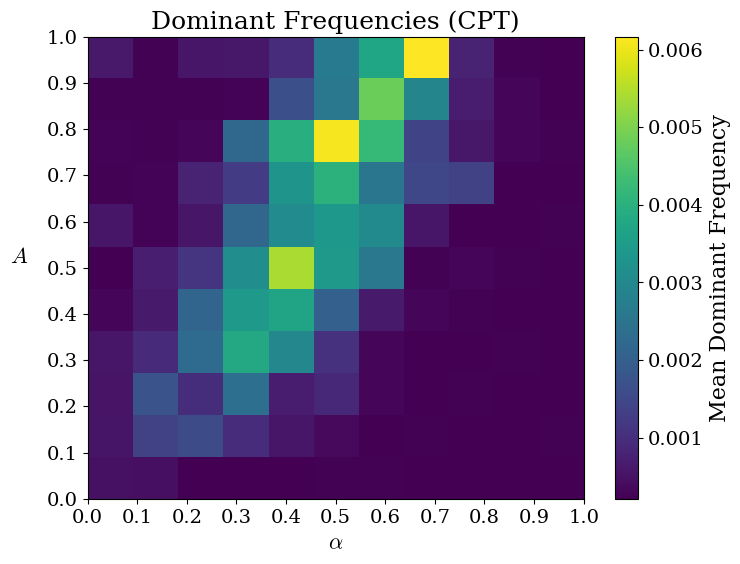

In [20]:
directory = "results_5"

with open(directory + "_dominant_frequencies.pickle", "rb") as f:
    freqs = pickle.load(f)

data = []
for idx,f in tqdm(enumerate(os.listdir(directory))):
    with open(os.path.join(directory, f), "rb") as f:
        res = pickle.load(f)
    data.append((res["params"]["w_delta_scale"], res["params"]["alpha"], freqs[idx]))

# Convert to numpy arrays
w_delta_scale = np.array([d[0] for d in data])
alpha = np.array([d[1] for d in data])
freq_lists = [d[2] for d in data]  # each element is a list

# Define bins
bins = np.linspace(0, 1, 12)  # 11 bins → 12 edges

# Prepare an array to store the mean frequency per bin
heatmap = np.zeros((11, 11))

# Iterate over bins
for i in range(11):
    for j in range(11):
        # Find indices that fall into this bin
        idxs = np.where(
            (w_delta_scale >= bins[i]) & (w_delta_scale < bins[i+1]) &
            (alpha >= bins[j]) & (alpha < bins[j+1])
        )[0]
        
        # Concatenate all lists of freqs in this bin
        if len(idxs) > 0:
            combined_freqs = np.concatenate([freq_lists[k] for k in idxs])
            heatmap[i, j] = combined_freqs.mean()
        else:
            heatmap[i, j] = np.nan  # optional, for empty bins

plt.figure(figsize=(8,6))
im = plt.imshow(heatmap, origin='lower', 
                extent=[0,1,0,1], aspect='auto', 
                cmap='viridis')
plt.colorbar(im, label='Mean Dominant Frequency')
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$A$', rotation=0, labelpad=20)
plt.title('Dominant Frequencies (CPT)')
plt.show()

In [22]:
directory = "cpt_no_effect"

with open(directory + "_dominant_frequencies.pickle", "rb") as f:
    freqs = pickle.load(f)

data = []
for idx,f in tqdm(enumerate(os.listdir(directory))):
    with open(os.path.join(directory, f), "rb") as f:
        res = pickle.load(f)
    data.append((res["params"]["w_delta_scale"], res["params"]["alpha"], freqs[idx]))

0it [00:00, ?it/s]

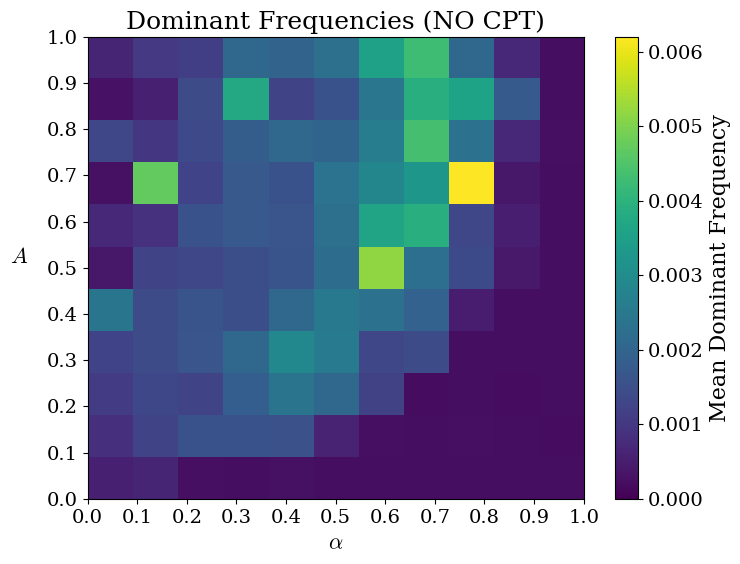

In [25]:
## Convert to numpy arrays
w_delta_scale = np.array([d[0] for d in data])
alpha = np.array([d[1] for d in data])
freq_lists = [d[2] for d in data]  # each element is a list

# Define bins
bins = np.linspace(0, 1, 12)  # 11 bins → 12 edges

# Prepare an array to store the mean frequency per bin
heatmap = np.zeros((11, 11))

# Iterate over bins
for i in range(11):
    for j in range(11):
        # Find indices that fall into this bin
        idxs = np.where(
            (w_delta_scale >= bins[i]) & (w_delta_scale < bins[i+1]) &
            (alpha >= bins[j]) & (alpha < bins[j+1])
        )[0]
        
        # Concatenate all lists of freqs in this bin
        if len(idxs) > 0:
            combined_freqs = np.concatenate([freq_lists[k] for k in idxs])
            heatmap[i, j] = combined_freqs.mean()
        else:
            heatmap[i, j] = np.nan  # optional, for empty bins

plt.figure(figsize=(8,6))
im = plt.imshow(heatmap, origin='lower', 
                extent=[0,1,0,1], aspect='auto', 
                cmap='viridis', 
                vmin=0, vmax=0.0062)
plt.colorbar(im, label='Mean Dominant Frequency')
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$A$', rotation=0, labelpad=20)
plt.title('Dominant Frequencies (NO CPT)')
plt.show()

# All Heatmaps

### CPT

In [17]:
directory = "results_5"

with open(directory + "_dominant_frequencies.pickle", "rb") as f:
    freqs = pickle.load(f)

data = []
for idx,f in tqdm(enumerate(os.listdir(directory))):
    with open(os.path.join(directory, f), "rb") as f:
        P = pickle.load(f)["params"]
    elem = ((P["alpha"], P["gamma"], P["omega"], P["eta"], P["P_H_increase"], P["P_H_decrease"], P["w_delta_scale"], freqs[idx]))
    data.append(elem)

0it [00:00, ?it/s]

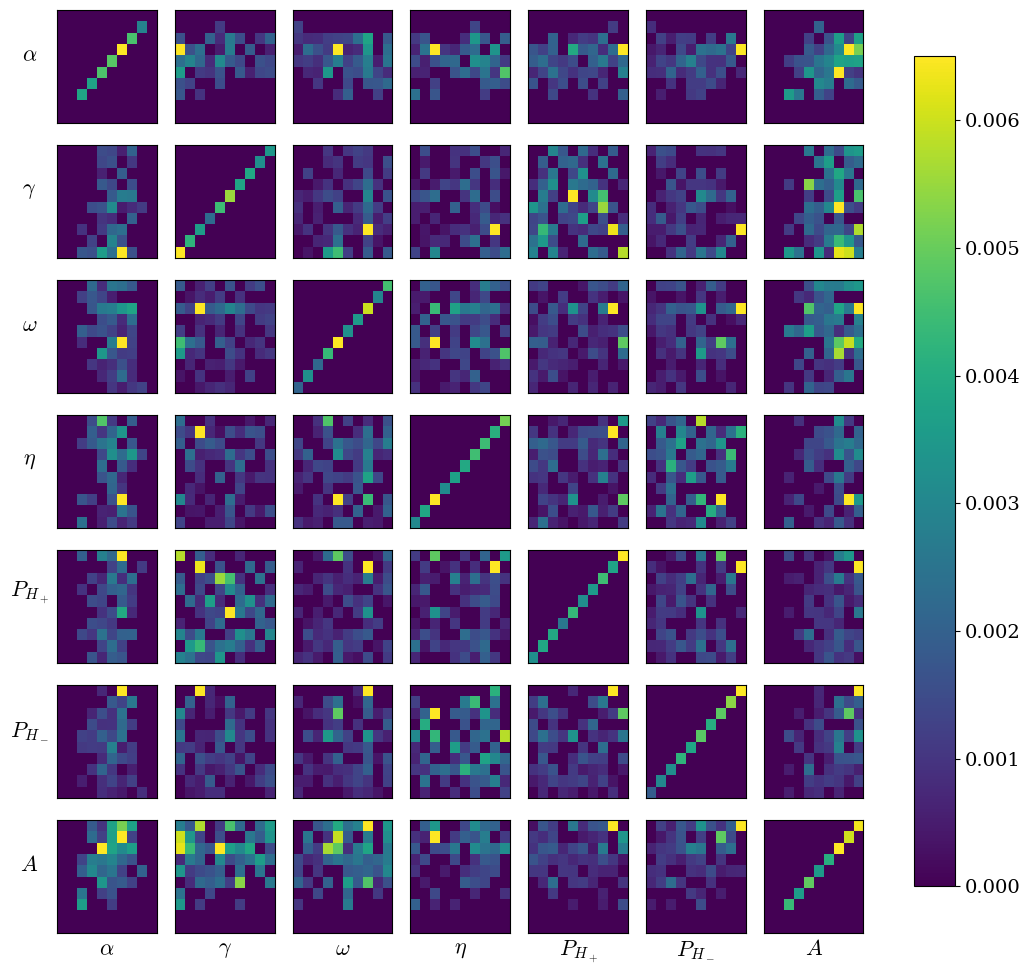

In [19]:
fig, axs = plt.subplots(7, 7, figsize=(11,10))

param_names = [r"$\alpha$", r"$\gamma$", r"$\omega$", r"$\eta$", r"$P_{H_+}$",  r"$P_{H_-}$", r"$A$"]
bounds = [[0,1], [0.4,0.8], [1,4], [0.5, 1], [0,1], [0,1], [0,1]]
freq_lists = [d[-1] for d in data]

for i in range(7):
    pi_values = np.array([d[i] for d in data])
    pi_bounds = np.linspace(bounds[i][0], bounds[i][1], 11)
    for j in range(7):
        pj_values = np.array([d[j] for d in data])
        pj_bounds = np.linspace(bounds[j][0], bounds[j][1], 11)
        heatmap = np.zeros((10, 10))
        
        # Iterate over bins
        for a in range(10):
            for b in range(10):
                # Find indices that fall into this bin
                idxs = np.where(
                    (pi_values >= pi_bounds[a]) & (pi_values < pi_bounds[a+1]) &
                    (pj_values >= pj_bounds[b]) & (pj_values < pj_bounds[b+1])
                )[0]
                
                # Concatenate all lists of freqs in this bin
                if len(idxs) > 0:
                    freq_lists_min_100_agents = [freq_lists[k] for k in idxs if len(np.where(~np.isnan(freq_lists[k]))[0]) > 1000]
                    if freq_lists_min_100_agents:
                        combined_freqs = np.concatenate(freq_lists_min_100_agents) 
                        heatmap[a, b] = combined_freqs[~np.isnan(combined_freqs) ].mean()
                    else:
                        heatmap[a,b] = 0
                else:
                    heatmap[a, b] = 0

        im = axs[i][j].imshow(heatmap, origin="lower", aspect="auto", cmap="viridis")
        axs[i][j].set_xticks([])
        axs[i][j].set_yticks([])
        if j == 0:
            axs[i][j].set_ylabel(param_names[i], rotation=0, labelpad=20)
        if i == 6:
            axs[i][j].set_xlabel(param_names[j])

        last_im = im

fig.tight_layout()
fig.colorbar(last_im, ax=axs.ravel().tolist(), shrink=0.9, norm="log")
# plt.savefig("CPT_dominant_frequencies_robust.pdf", bbox_inches="tight")
plt.show()

### NO CPT

In [11]:
directory = "cpt_no_effect"

with open(directory + "_dominant_frequencies.pickle", "rb") as f:
    freqs = pickle.load(f)

data = []
for idx,f in tqdm(enumerate(os.listdir(directory))):
    with open(os.path.join(directory, f), "rb") as f:
        P = pickle.load(f)["params"]
    elem = ((P["alpha"], P["P_H_increase"], P["P_H_decrease"], P["w_delta_scale"], freqs[idx]))
    data.append(elem)

0it [00:00, ?it/s]

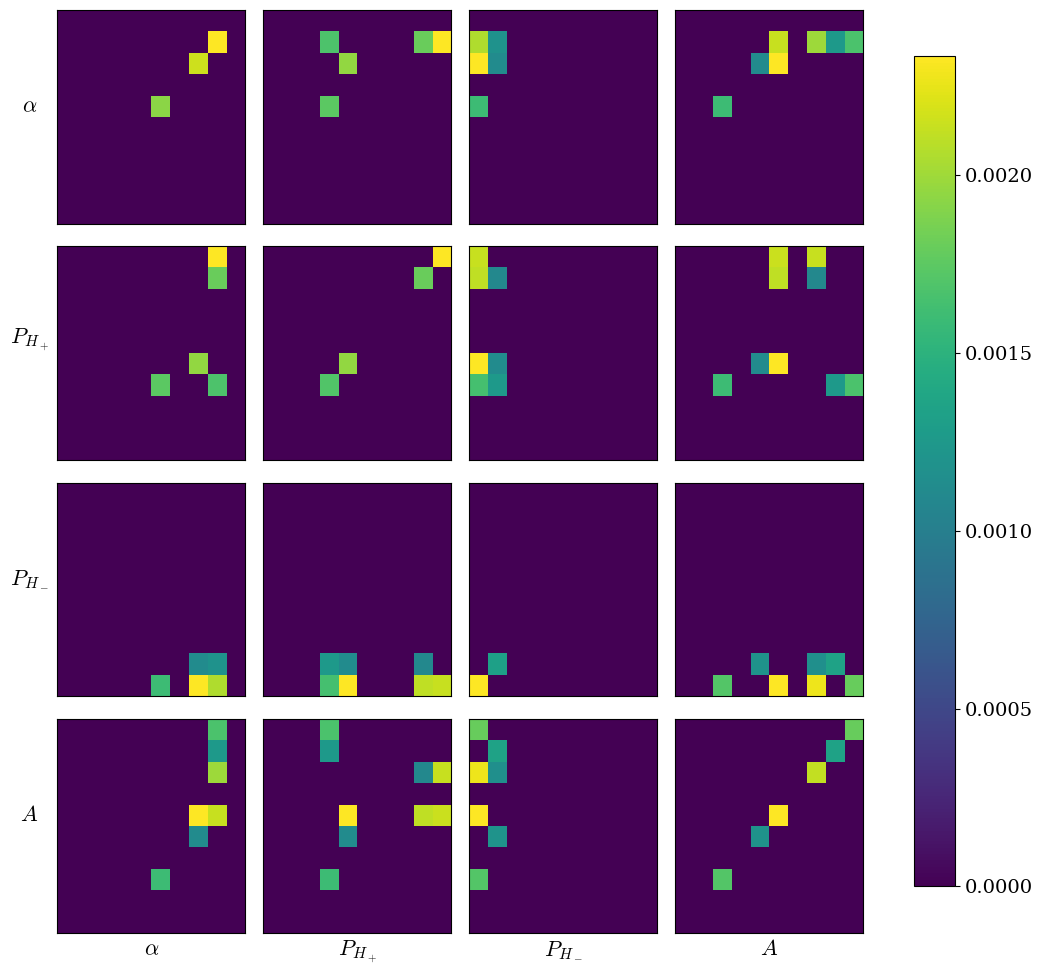

In [16]:
fig, axs = plt.subplots(4, 4, figsize=(11,10))

param_names = [r"$\alpha$", r"$P_{H_+}$", r"$P_{H_-}$", r"$A$"]
bounds = [[0,1], [0,1], [0,1], [0,1]]
freq_lists = [d[-1] for d in data]

map_vals = []
for i in range(len(param_names)):
    pi_values = np.array([d[i] for d in data])
    pi_bounds = np.linspace(bounds[i][0], bounds[i][1], 11)
    for j in range(len(param_names)):
        pj_values = np.array([d[j] for d in data])
        pj_bounds = np.linspace(bounds[j][0], bounds[j][1], 11)
        heatmap = np.zeros((10, 10))
        
        # Iterate over bins
        for a in range(10):
            for b in range(10):
                # Find indices that fall into this bin
                idxs = np.where(
                    (pi_values >= pi_bounds[a]) & (pi_values < pi_bounds[a+1]) &
                    (pj_values >= pj_bounds[b]) & (pj_values < pj_bounds[b+1])
                )[0]

                # Concatenate all lists of freqs in this bin
                if len(idxs) > 0:
                    freq_lists_min_100_agents = [freq_lists[k] for k in idxs if len(np.where(~np.isnan(freq_lists[k]))[0]) > 1000]
                    if freq_lists_min_100_agents:
                        combined_freqs = np.concatenate(freq_lists_min_100_agents) 
                        heatmap[a, b] = combined_freqs[~np.isnan(combined_freqs) ].mean()
                    else:
                        heatmap[a,b] = 0
                else:
                    heatmap[a, b] = 0

        im = axs[i][j].imshow(heatmap, origin="lower", aspect="auto", cmap="viridis")
        axs[i][j].set_xticks([])
        axs[i][j].set_yticks([])
        if j == 0:
            axs[i][j].set_ylabel(param_names[i], rotation=0, labelpad=20)
        if i == len(param_names)-1:
            axs[i][j].set_xlabel(param_names[j])
        last_im = im

        map_vals.append(heatmap.flatten())

fig.tight_layout()
fig.colorbar(last_im, ax=axs.ravel().tolist(), shrink=0.9, norm="log")
# plt.savefig("No-CPT_dominant_frequencies_robust.pdf", bbox_inches="tight")
plt.show()

# Decay Plot

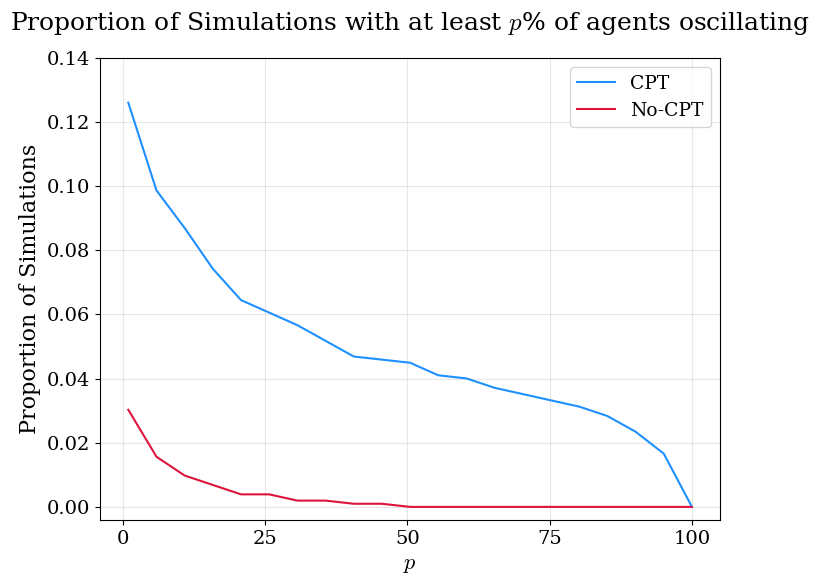

In [107]:
labels = ["CPT", "No-CPT"]
colors = ["dodgerblue", "crimson"]

for i, directory in enumerate(["results_5", "cpt_no_effect"]):
    with open(directory + "_dominant_frequencies.pickle", "rb") as f:
        freqs = pickle.load(f)
    prop_sims = []
    linspace = np.linspace(100, 10000, 21)
    for cutoff in linspace:
        sims = [s for s in freqs if len(np.where(~np.isnan(s))[0]) >= cutoff]
        prop_sims.append(len(sims)/1024)
    plt.plot(linspace/10000, prop_sims, label=labels[i], color=colors[i])

plt.title(r"Proportion of Simulations with at least $p$% of agents oscillating", pad=20)
plt.xlabel(r"$p$")
plt.ylabel("Proportion of Simulations")
plt.xticks(np.linspace(0.0, 1.0, 5), [0, 25, 50, 75, 100])
plt.ylim(-0.004, 0.14)
plt.legend()
plt.grid()
plt.show()

# KDE of Dominant Freqs

0.0005 0.137
0.0005 0.027


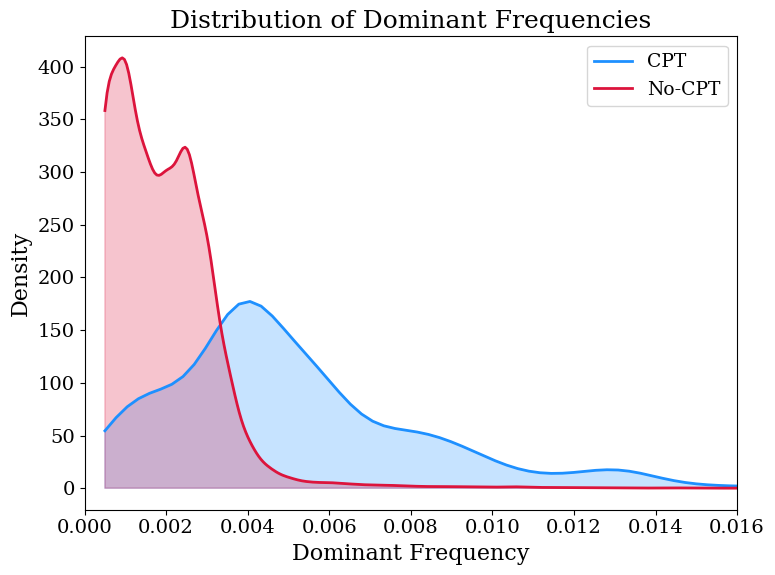

In [137]:
labels = ["CPT", "No-CPT"]
colors = ["dodgerblue", "crimson"]

cutoff = 100

for i, directory in enumerate(["results_5", "cpt_no_effect"]):
    with open(directory + "_dominant_frequencies.pickle", "rb") as f:
        freqs = pickle.load(f)

    sims = [s for s in freqs if len(np.where(~np.isnan(s))[0]) >= cutoff]
    sims = np.concatenate(sims)
    sims = sims[~np.isnan(sims)]
    print(sims.min(), sims.max())

    # compute KDE
    kde = gaussian_kde(sims, bw_method=0.2)

    # grid for x-values
    x_vals = np.linspace(min(sims), max(sims), 500)
    y_vals = kde(x_vals)

    # normalize so area = 1 (proportion density)
    y_vals /= np.trapz(y_vals, x_vals)
    plt.plot(x_vals, y_vals, color=colors[i], label=labels[i], lw=2)
    plt.fill_between(x_vals, y_vals, color=colors[i], alpha=0.25)

plt.xlim(0, 0.016)
plt.xlabel("Dominant Frequency")
plt.ylabel("Density")
plt.title("Distribution of Dominant Frequencies")
plt.legend()
plt.tight_layout()
plt.show()